<a href="https://colab.research.google.com/github/BigguyPapsi/Colab/blob/main/Polynomial%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ຫົວຂໍ້ທີ່ 4 Polynomial Regression

# 1 Import

* imoprt : pandas ແລ້ວໃຫ້ເອີ່ນ pandas ວ່າ pd

* pandas ໃຊ້ໃນການຈັດການຂໍ້ມູນຂະໜາດນ້ອຍຈົນໄປຮອດຂໍ້ມູນຂະໜາດໃຫຍ່

* imoprt : numpy ແລ້ວໃຫ້ເອີ່ນ numpy ວ່າ np

* numpy ແມ່ນ Libary ທີ່ໃຊ້ໃນການຄຳນວນທາງຄະນິດສາດຂອງພາສາ Python ໂດຍ numpy ສາມາດຈັດການ ອາເຣ (array) ຫຼາຍມິຕິໄດ້

* imoprt : matplotlib.pyplot ແລ້ວໃຫ້ເອີ່ນ matplotlib.pyplot ວ່າ plt

* matplotlib ແມ່ນ Module ພື້ນຖາມໃນການສ້າງກຣາຟ ໃນພາສາ python

* imoprt : seaborn ແລ້ວໃຫ້ເອີ່ນ seaborn ວ່າ sns

* seaborn ເປັນ libary ຂອງ matplotlib ທີ່ໃຊ້ໄວ້ແຈກແຈງໃຫ້ເຮົາເຫັນພາບຂໍ້ມູນທີ່ເປັນແບບ ສຸ່ມ

* %matplotlib inline ແມ່ນຄຳສັ່ງອະນຸຍາດໃຫ້ເຮົາສະແດງກຣາຟ(graph) ໃນ Notebook ໄດ້

* %config InlineBackend.figure_format='retina' ແມ່ນການຕັ້ງຄ່າການສະແດງຜົນຂອງກຣາຟ

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

# 1.1 ບອກ version ຂອງ pandas, numpy, seaborn

In [21]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')
print(pd.Timestamp.now())

pandas  version = 1.3.5
numpy   version = 1.21.6
seaborn version = 0.11.2
2023-01-20 16:23:17.586572


# 1.2 ນຳຂໍ້ມູນເຂົ້າມາ ແລ້ວສະແດງອອກມາ 10 ອັນແບບສຸມ

In [22]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/worldbank_gdp_gini_birth_death_suicide_rate.csv'
data=pd.read_csv(url)
data.sample(10)

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
7172,Kenya,1993,3.828867e+10,NaN,40.542000,10.899000,NaN
14220,Trinidad and Tobago,1961,NaN,NaN,36.754000,8.806000,NaN
13399,Sub-Saharan Africa,1966,NaN,NaN,47.000184,21.822123,NaN
10562,Northern Mariana Islands,1961,NaN,NaN,NaN,NaN,NaN
10482,North America,1999,1.047680e+13,NaN,13.905263,8.462456,NaN
4949,Gabon,2012,2.686845e+10,NaN,33.281000,8.481000,NaN
1043,Barbados,2000,3.449581e+09,NaN,13.934000,7.553000,2.1
2320,Central African Republic,1979,NaN,NaN,41.826000,17.711000,NaN
2261,Cayman Islands,1979,NaN,NaN,NaN,NaN,NaN
12496,Sint Maarten (Dutch part),2007,NaN,NaN,11.700000,3.200000,NaN


# 1.3 ເບິ່ງລາຍລະອຽດຂໍ້ມູນ

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          15576 non-null  object 
 1   year                                             15576 non-null  int64  
 2   GDP, PPP (current international $)               6726 non-null   float64
 3   Gini index (World Bank estimate)                 1649 non-null   float64
 4   Birth rate, crude (per 1,000 people)             14515 non-null  float64
 5   Death rate, crude (per 1,000 people)             14492 non-null  float64
 6   Suicide mortality rate (per 100,000 population)  1145 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 851.9+ KB


# 2 filter and visualize country data

#2.1 

In [24]:
data[data['country'].str.contains('Thailand')][:3]

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
13983,Thailand,1960,NaN,NaN,42.735,13.180,NaN
13984,Thailand,1961,NaN,NaN,42.617,12.853,NaN
13985,Thailand,1962,NaN,NaN,42.469,12.534,NaN


# 2.2 ກອງຂໍ້ມູນ ເພື່ອນຳມາເຮັດການປະມ່ວນຜົນ

* ກຳນົດໃຫ້

x_col = 'year'

y_col = 'Death rate, crude (per 1,000 people)'

In [25]:
x_col='year'
y_col='Death rate, crude (per 1,000 people)'
# y_col='Birth rate, crude (per 1,000 people)'
country='Thailand'

# 2.2 ສ້າງໂຕປ່ຽນ Dataframe ແລະ ສະແດງ Dataframe

In [26]:
df=data[data['country']==country].copy()
df

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
13983,Thailand,1960,NaN,NaN,42.735,13.180,NaN
13984,Thailand,1961,NaN,NaN,42.617,12.853,NaN
13985,Thailand,1962,NaN,NaN,42.469,12.534,NaN
13986,Thailand,1963,NaN,NaN,42.283,12.226,NaN
13987,Thailand,1964,NaN,NaN,42.041,11.929,NaN
13988,Thailand,1965,NaN,NaN,41.708,11.639,NaN
13989,Thailand,1966,NaN,NaN,41.244,11.346,NaN
13990,Thailand,1967,NaN,NaN,40.625,11.046,NaN
13991,Thailand,1968,NaN,NaN,39.845,10.733,NaN
13992,Thailand,1969,NaN,NaN,38.912,10.408,NaN


# 2.3 ນຳໃຊ້ Seaborn ມາສະແດງກຣາຟເບິ່ງອັດຕາການເສຍຊີວິດປະຊາກອນໄທທີ່ຜ່ານມາ

ຈາກການສັງເກດກຣາຟ ຖ້າເຮົາໃຊ້ຮູບແບບ Linear ຫຼື ເສັ້ນສີແດງ ການສະແດງຜົນມັນຈະຜິດທັນທີ່

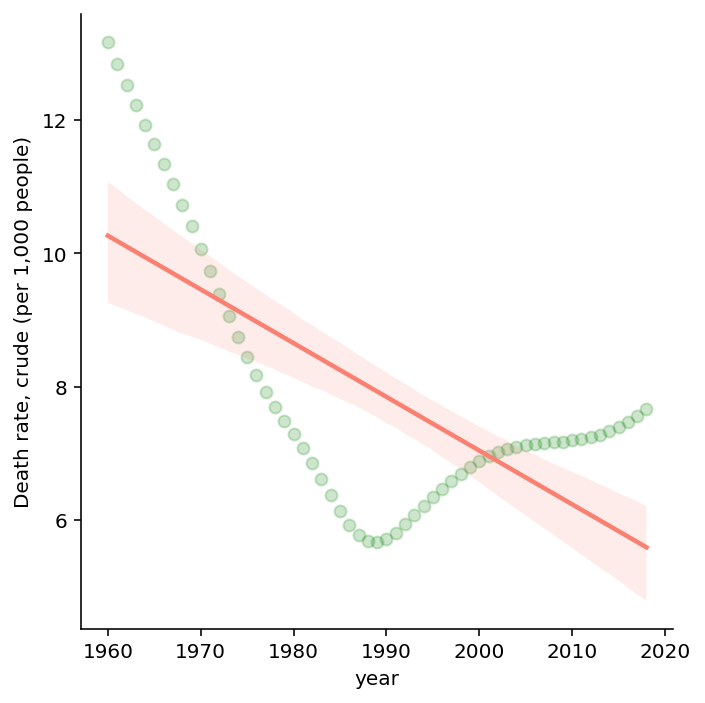

In [27]:
sns.lmplot(x=x_col, y=y_col, data=df, fit_reg=True, 
           scatter_kws={'alpha': .2, 'color': 'green'},
           line_kws={'color': 'salmon'});

# 3 scikit-learn

* import sklearn
* import train_test_split
* import PolynomialFeatures
* import LinearRegression

In [28]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#3.1 ກວດເບິ່ງ Version ຂອງ sklearn

In [29]:
print(f'sklearn  version = {sk.__version__}')

sklearn  version = 1.0.2


#3.2 ສ້າງໂຕປ່ຽນ

X = x_col


y = y_col

In [30]:
X=df[[x_col]]
y=df[y_col]

# 3.3 ສະແດງຂໍ້ມູນໃນ X ແລະ Y 3ໂຕທຳອິດອອກມາ

* ສະແດງຂໍ້ມູນ 3 ປີທຳອິດທີ່ຢູ່ໃນ Dataframe

In [31]:
X[:3]

,year
13983,1960
13984,1961
13985,1962


* ອັດຕາການເສຍຊີວິດຂອງປະຊາກອນຢູ່ທີ່ 13.180 ຕໍ່ປະຊາກອນ 1000 ຄົນ
* ອັດຕາການເສຍຊີວິດຂອງປະຊາກອນຢູ່ທີ່ 12.853 ຕໍ່ປະຊາກອນ 1000 ຄົນ
* ອັດຕາການເສຍຊີວິດຂອງປະຊາກອນຢູ່ທີ່ 12.534 ຕໍ່ປະຊາກອນ 1000 ຄົນ

In [32]:
y[:3]

13983    13.180
13984    12.853
13985    12.534
Name: Death rate, crude (per 1,000 people), dtype: float64

# 3.4 train_test_split ຜ່ານຄ່າ X ກັບ Y

* ແລ້ວເຮົາກໍຈະໄດ້ອອກມາ 4 ອັນຄື: X_train, X_test, y_train, y_test

In [33]:
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=1)

#4 linear regression
imple regression model

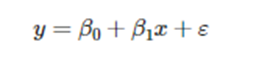

B0 = intercept

B1 = coef

x = year

# 4.1 ສ້າງ lm ໄວ້ເກັບຄ່າ LinearRegression ແລ້ວສະແດງ lm ອອກມາ

In [34]:
lm = LinearRegression()
lm

LinearRegression()

#4.2 ຕໍ່ໄປກໍຈະ Fit Model ດ້ວຍ X_train, y_train

In [35]:
lm.fit(X_train, y_train)

LinearRegression()

# 4.3 ຖ້າມັນເປັນ LinearRegression ຜົນທີ່ໄດ້ກໍຈະເປັນ R-squared

In [36]:
lm.score(X_train, y_train) # R-squared

0.4353052622557835

# coef = -0.07 ແທນໃສ່ B1

In [37]:
lm.coef_

array([-0.07661316])

# intercept = 160 ແທນໃສ່ B0

In [38]:
lm.intercept_

160.27616227662946

# 4.4 ທົດລອງໃຊ້ X_test, y_test ໃນ R-squared

In [39]:
lm.score(X_test, y_test) # R-squared

0.5856015176097809

#4.5 ສະແດງກຣາຟອັນຕາການເສຍຊີວິດ

ເສັ້ນສີແດງມາຈາກ = plt.scatter(X, y, color = 'green', alpha=.2)

ເສັ້ນສີຂຽວມາຈາກ = plt.plot(X, lm.predict(X), color = 'red', alpha=.5)

ແກນ x ແມ່ນປິ

ແກນ y ແມ່ນ ຈຳນວນຜູ້ເສຍຊີວິດ ຕໍ່ 1000 ຄົນ

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

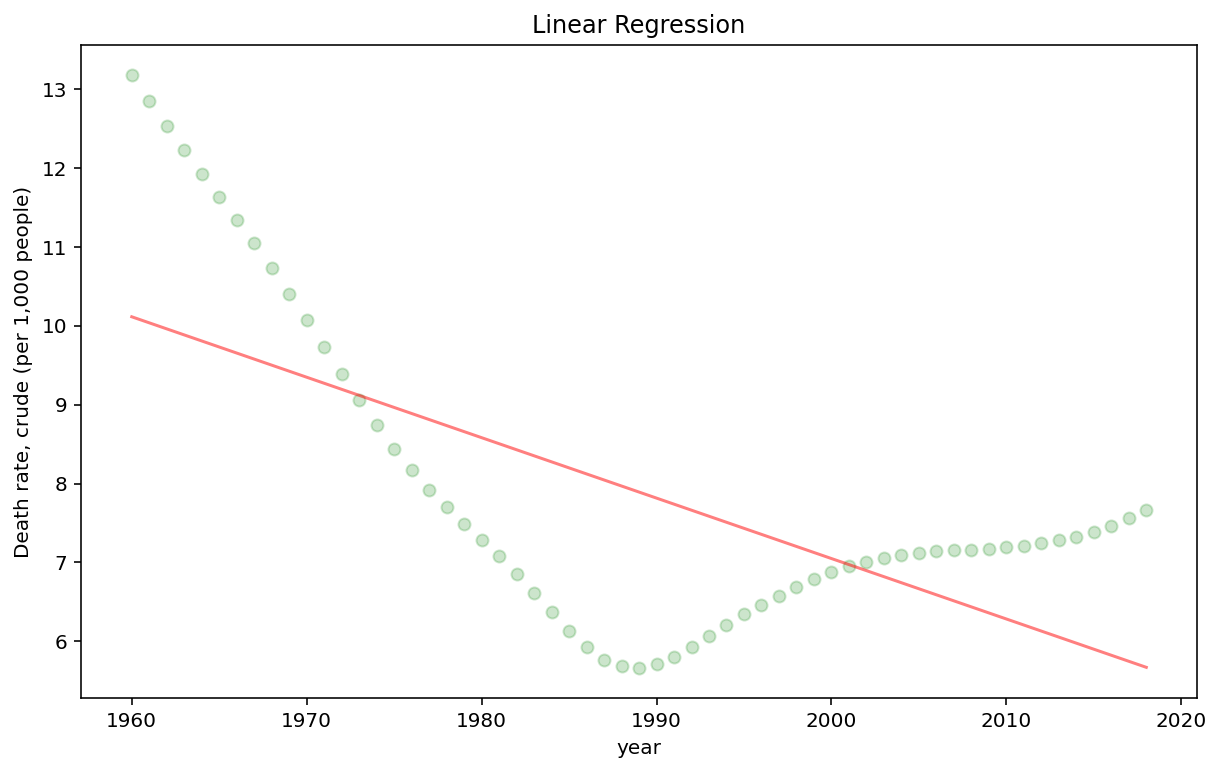

In [40]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'green', alpha=.2)
plt.plot(X, lm.predict(X), color = 'red', alpha=.5)
plt.title('Linear Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

# 4.6 ການພະຍາກອນ 

* ປ້ອນຂໍ້ມູນທີ່ເຮົາຕ້ອງການໃຫ້ຄອມປະມວນຜົນເຂົ້າໄປແລ້ວໃນມັນລອງພະຍາກອນລອງເບິ່ງ

In [41]:
lm.predict([[1990], 
            [2020]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.81597278, 5.51757797])

# polynomial regression
simple regression model

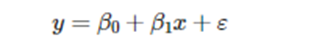

general polynomial regression model

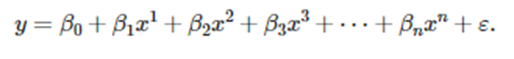



In [42]:
poly = PolynomialFeatures(degree=2)

In [43]:
#poly.get_feature_names()

In [44]:
v=1990
v**0, v**1, v**2

(1, 1990, 3960100)

In [45]:
X_train[:3]

,year
14019,1996
14023,2000
14007,1984


In [46]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [47]:
X_train[:3]

,year
14019,1996
14023,2000
14007,1984


In [48]:
X_train_poly[:3]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06]])

In [49]:
pm = LinearRegression()
pm.fit(X_train_poly, y_train)

LinearRegression()

In [50]:
pm.score(X_train_poly, y_train) # R-squared

0.9448282949367037

In [51]:
pm.intercept_

21619.43539756367

In [52]:
pm.coef_

array([ 0.00000000e+00, -2.16491346e+01,  5.42121601e-03])

In [53]:
pm.score(X_test_poly, y_test) # R-squared

0.9491064757890537

In [54]:
X_train[:3]

,year
14019,1996
14023,2000
14007,1984


In [55]:
X_train_poly[:3]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06]])

In [56]:
pm.intercept_ + sum((pm.coef_ * X_train_poly[0]))

5.974124829725042

In [57]:
pm.predict(X_train_poly[:3])

array([5.97412483, 6.0303033 , 6.84646291])

In [58]:
pm.predict(poly.fit_transform([[1996]]))

array([5.97412483])

In [59]:
pm.predict(poly.fit_transform([[1996], [2000], [1984]]))

array([5.97412483, 6.0303033 , 6.84646291])

In [60]:
def predict(intercept, coef, x):
    v=intercept
    for p in range(len(coef)):
       v += x ** p * coef[p]
    return v

In [61]:
predict(pm.intercept_, pm.coef_, 1996)

5.974124829725042

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

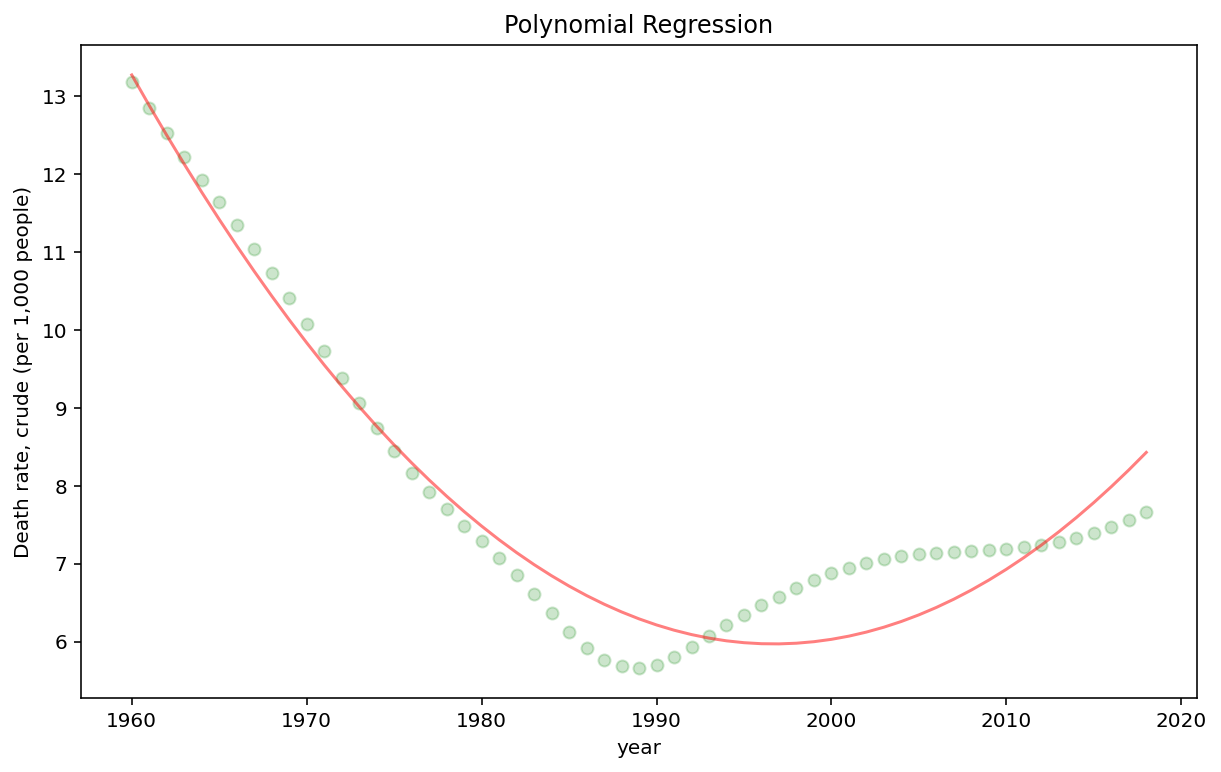

In [62]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'green', alpha=.2)
plt.plot(X, pm.predict(poly.fit_transform(X)), color = 'red', alpha=.5)
plt.title('Polynomial Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

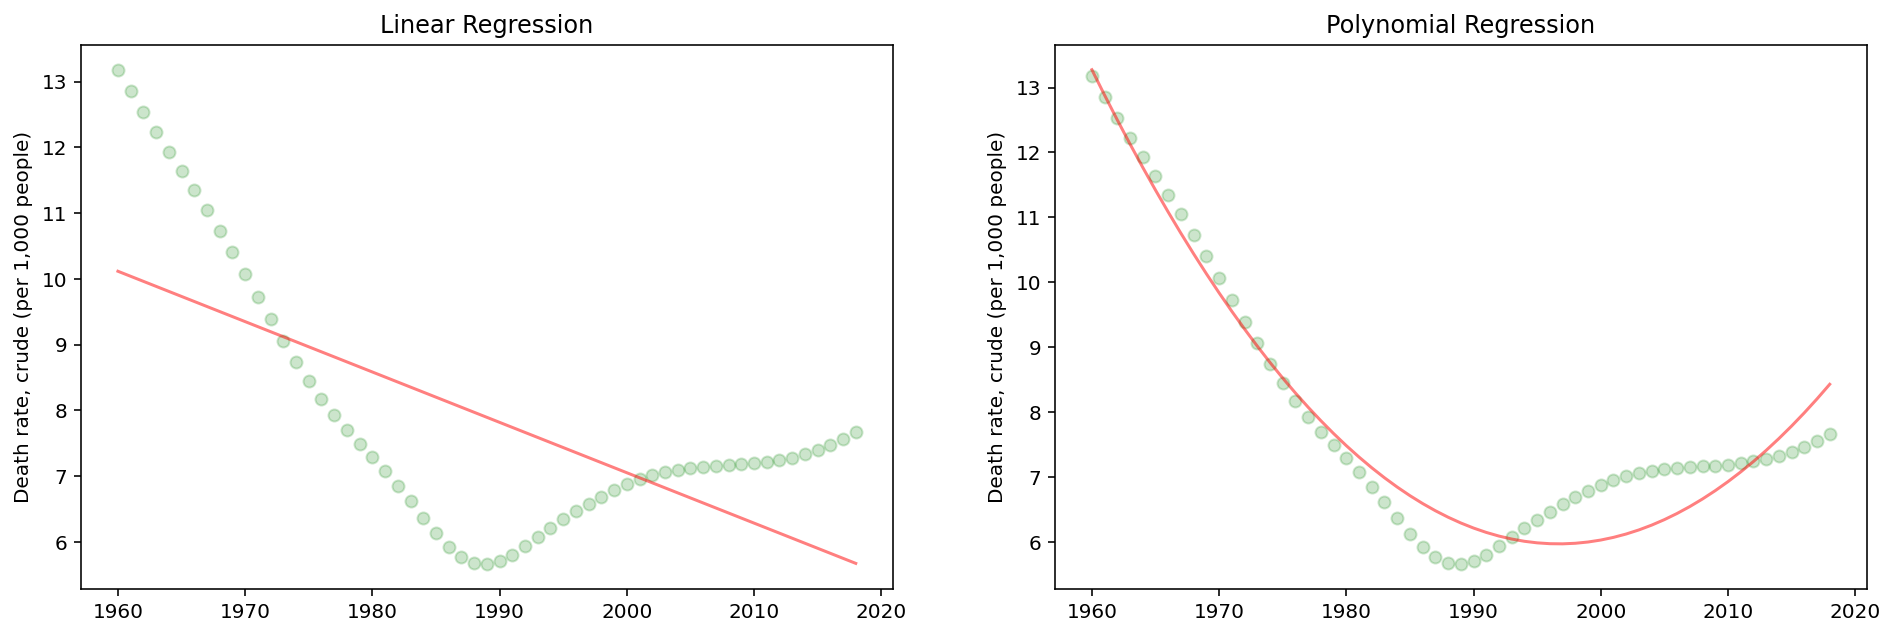

In [63]:
fig = plt.figure(figsize=(8 * 2, 5))
d={'Linear Regression': lm.predict(X),
   'Polynomial Regression': pm.predict(poly.fit_transform(X))}
i=1
for title, y_pred in d.items():
    fig.add_subplot(1, 2, i)
    plt.scatter(X, y, color = 'green', alpha=.2)
    plt.plot(X, y_pred, color = 'red', alpha=.5)
    plt.title(title)
    #plt.xlabel(x_col)
    plt.ylabel(y_col)
    i += 1

# Plot varying by degree

degree = 1: R_square (train) = 0.4353, (test) = 0.5856
degree = 2: R_square (train) = 0.9448, (test) = 0.9491
degree = 3: R_square (train) = 0.9641, (test) = 0.9814
degree = 4: R_square (train) = 0.9644, (test) = 0.9815
degree = 5: R_square (train) = 0.9647, (test) = 0.9817
degree = 6: R_square (train) = 0.9649, (test) = 0.9819


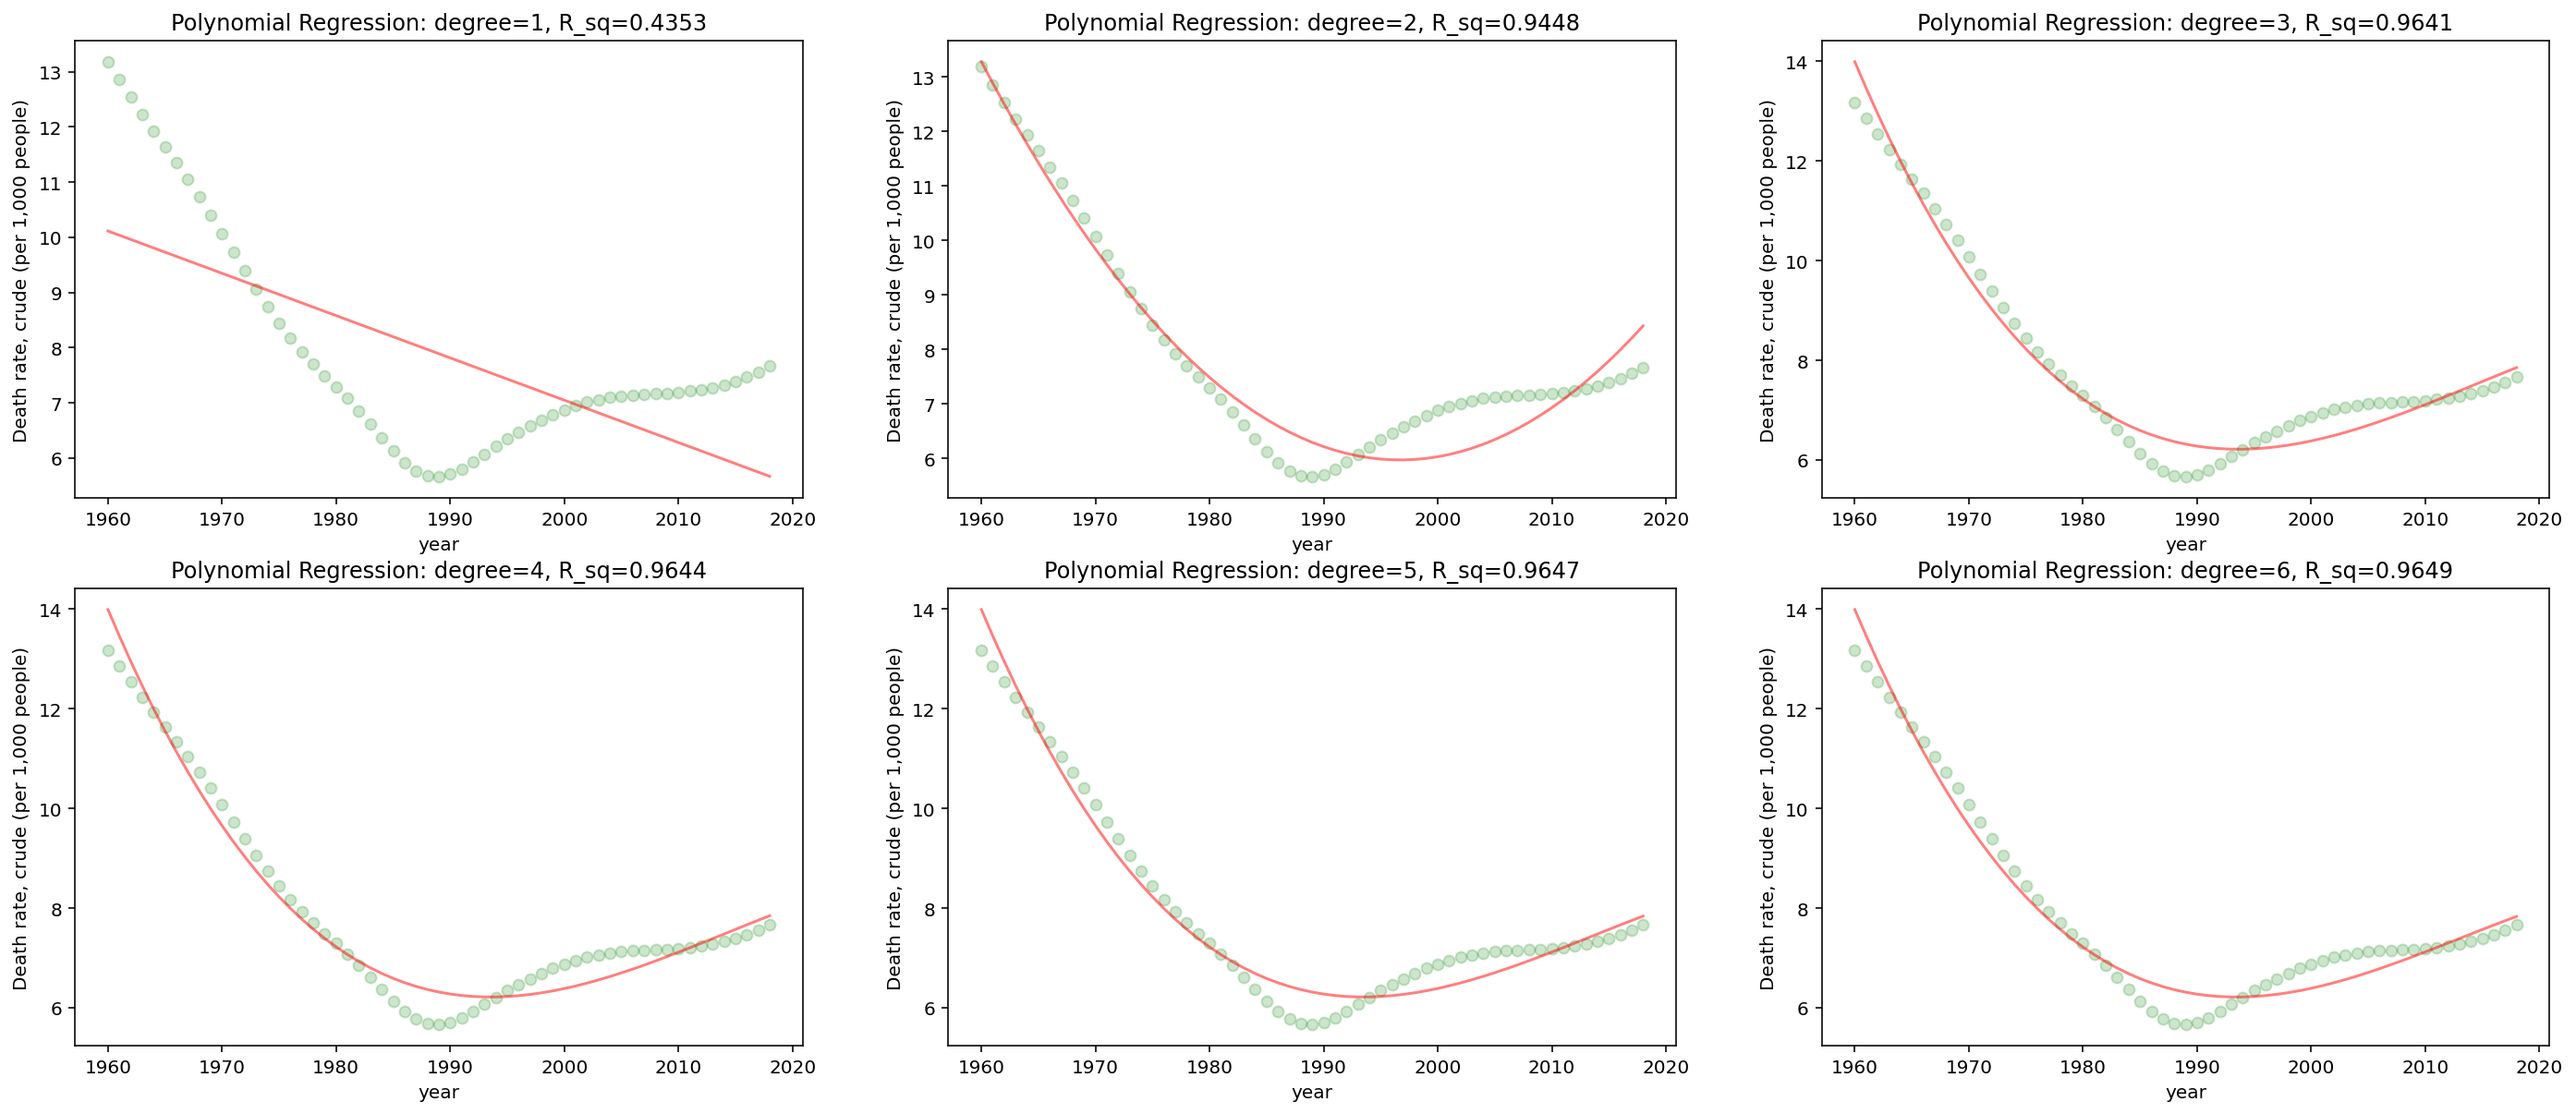

In [64]:
def plots(degree_ranges=range(2, 8)):
    import math
    n=len(degree_ranges)
    n_rows=2
    n_cols=math.ceil(n / n_rows)
    fig = plt.figure(figsize=(8 * n_cols, 5 * n_rows))
    i=1
    for degree in degree_ranges:
        poly = PolynomialFeatures(degree = degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.fit_transform(X_test)

        poly.fit(X_train_poly, y_train)
        pm = LinearRegression()
        pm.fit(X_train_poly, y_train)
        rsq_train=pm.score(X_train_poly, y_train) # R-squared
        rsq_test=pm.score(X_test_poly, y_test) # R-squared
        print(f'degree = {degree}: R_square (train) = {rsq_train:.4f}, (test) = {rsq_test:.4f}')
#         print(pm.coef_)
        
        fig.add_subplot(n_rows, n_cols, i)
        y_pred=pm.predict(poly.fit_transform(X))
        plt.scatter(X, y, color = 'green', alpha=.2)
        plt.plot(X, y_pred, color = 'red', alpha=.5)
        plt.title(f'Polynomial Regression: degree={degree}, R_sq={rsq_train:.4f}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        i += 1
#     plt.show()

plots(range(1, 7))

In [65]:
dt=X_train.copy()
dt[y_col]=y_train
dt[:5]

,year,"Death rate, crude (per 1,000 people)"
14019,1996,6.465
14023,2000,6.877
14007,1984,6.367
13993,1970,10.072
14034,2011,7.213


In [66]:
dt.columns=['year', 'death_rate']

In [67]:
import statsmodels.formula.api as smf

In [68]:
formula = 'death_rate ~ year + I(year**2)'
# formula = 'death_rate ~ year + I(year**2) + I(year**3)'
model1 = smf.ols(formula=formula, data=dt)
model1_fit=model1.fit()

In [69]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             death_rate   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     376.8
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           2.08e-28
Time:                        16:23:22   Log-Likelihood:                -30.931
No. Observations:                  47   AIC:                             67.86
Df Residuals:                      44   BIC:                             73.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.162e+04   1064.573     20.308      0.000    1.95e+04    2.38e+04
year           -21.6491      1.070    -20.230      0.000     -23.806     -19.492
I(year ** 2)     0.0054      0.000     20.158      0.000       0.005       0.006
==============================================================================
Omnibus:                        2.525   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                1.767
Skew:                           0.272   Prob(JB):                        0.413
Kurtosis:                       2.222   Cond. No.                     5.98e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
pm.intercept_

21619.43539756367

In [71]:
pm.coef_

array([ 0.00000000e+00, -2.16491346e+01,  5.42121601e-03])

In [72]:
pm.score(X_train_poly, y_train) # R-squared

0.9448282949367037

In [73]:
X_train[:5]

,year
14019,1996
14023,2000
14007,1984
13993,1970
14034,2011


In [74]:
model1.exog[:5]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06],
       [1.000000e+00, 1.970000e+03, 3.880900e+06],
       [1.000000e+00, 2.011000e+03, 4.044121e+06]])

In [75]:
X_train_poly[:5]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06],
       [1.000000e+00, 1.970000e+03, 3.880900e+06],
       [1.000000e+00, 2.011000e+03, 4.044121e+06]])

In [76]:
model1_fit.predict(dt['year'][:5])

14019    5.974125
14023    6.030303
14007    6.846463
13993    9.837513
14034    7.079295
dtype: float64

In [77]:
pm.predict(X_train_poly[:5])

array([5.97412483, 6.0303033 , 6.84646291, 9.83751329, 7.07929472])

In [78]:
import statsmodels.api as sm

model2 = sm.OLS(y_train, X_train_poly)

model2_fit=model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Death rate, crude (per 1,000 people)   R-squared:                       0.945
Model:                                              OLS   Adj. R-squared:                  0.942
Method:                                   Least Squares   F-statistic:                     376.8
Date:                                  Fri, 20 Jan 2023   Prob (F-statistic):           2.08e-28
Time:                                          16:23:23   Log-Likelihood:                -30.931
No. Observations:                                    47   AIC:                             67.86
Df Residuals:                                        44   BIC:                             73.41
Df Model:                                             2                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.162e+04   1064.573     20.308      0.000    1.95e+04    2.38e+04
x1           -21.6491      1.070    -20.230      0.000     -23.806     -19.492
x2             0.0054      0.000     20.158      0.000       0.005       0.006
==============================================================================
Omnibus:                        2.525   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                1.767
Skew:                           0.272   Prob(JB):                        0.413
Kurtosis:                       2.222   Cond. No.                     5.98e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
model2_fit.predict(X_train_poly[:5])

array([5.97412484, 6.0303033 , 6.84646292, 9.8375133 , 7.07929473])

In [80]:
pm.predict(X_train_poly[:5])

array([5.97412483, 6.0303033 , 6.84646291, 9.83751329, 7.07929472])

In [81]:
model1_fit.predict(dt['year'][:5])

14019    5.974125
14023    6.030303
14007    6.846463
13993    9.837513
14034    7.079295
dtype: float64